In [1]:
import pandas as pd
import numpy as np
import statistics as st
import streamlit as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import nbformat



In [2]:
# reading the file
df = pd.read_csv(r"E:\Naren Baskar\indus new\Copper_Set.xlsx - Result 1 (3).csv")


In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
# columns
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [6]:
# renaming for undersatnding
df.rename(columns={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'},inplace=True)


In [7]:
# checking the rename columns
df.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price'],
      dtype='object')

In [8]:
# checking the datatypes
df.dtypes

id                object
item_date        float64
quantity_tons     object
customer         float64
country          float64
status            object
item_type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery_date    float64
selling_price    float64
dtype: object

In [9]:
# here we want to change the datatypes for item_date,quantity_tons,customer,delivery_date
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%Y%m%d', errors='coerce')
# creating the no of days columns
df['no_of_days'] = (df['delivery_date']-df['item_date']).dt.days

In [10]:
df.tail(100)

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,no_of_days
181573,5A70B014-846F-45E5-B00C-F5AE9520B81F,2020-07-02,16.69221259,30201866.0,32.0,Won,W,41.0,0.50,1250.0,7016/17/1250/0.50,611993,2020-07-01,811.0,-1.0
181574,F785E585-928B-4C43-AEFE-4C74BD099F6A,2020-07-02,7.036691784,30200854.0,25.0,Won,W,41.0,0.58,1220.0,0000000000000000000000000000000001002185,611993,2020-07-01,831.0,-1.0
181575,46884F20-11A7-4AFF-BCF3-CCE0D394E959,2020-07-02,13.72895167,30201866.0,32.0,Won,W,41.0,0.50,996.0,6011/17/996/0.50,611993,2020-07-01,812.0,-1.0
181576,D6D021F1-B64E-4469-9214-D82F67A1E768,2020-07-02,2.092644979,30200854.0,25.0,Won,W,41.0,0.55,1220.0,0000000000000000000000000000000001000093,611993,2020-07-01,835.0,-1.0
181577,E5093804-1FE8-45D0-9AD5-ADB1BCD16A82,2020-07-02,7.781862531,30200854.0,25.0,Won,W,41.0,0.45,1220.0,0000000000000000000000000000000001000112,611993,2020-07-01,850.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.0,-1.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.0,-1.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.0,-1.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.0,-1.0


In [11]:
# Check how many negative values are in the no_of_days column
negative_count = (df['no_of_days'] < 0).sum()
negative_count

np.int64(16107)

In [12]:
# Drop rows where no_of_days is less than 0
df = df[df['no_of_days'] >= 0]

In [13]:
df.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,no_of_days
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0,0.0
5,FE372230-29B1-4A29-BB73-CB9D3078C286,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,2021-04-01,983.0,0.0
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,18.0,91.0
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,2021-07-01,1363.0,91.0


In [14]:
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'],errors='coerce')
df['customer'] = pd.to_numeric(df['customer'],errors='coerce')

In [15]:
# checking datatypes
df.dtypes

id                       object
item_date        datetime64[ns]
quantity_tons           float64
customer                float64
country                 float64
status                   object
item_type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
no_of_days              float64
dtype: object

In [16]:
# checking nan values
df.isna().sum()

id                   2
item_date            0
quantity_tons        1
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     72457
product_ref          0
delivery_date        0
selling_price        1
no_of_days           0
dtype: int64

In [17]:
df['item_date'] = df['item_date'].fillna(df['item_date'].mode().iloc[0])
df['delivery_date'] = df['delivery_date'].fillna(df['delivery_date'].mode())
df['quantity_tons'] = df['quantity_tons'].fillna(0)
df['customer'] = df['customer'].fillna(0)
df['country'] = df['country'].fillna(df['country'].median())
df['status'] = df['status'].fillna(df['status'].mode().iloc[0])
df['application'] = df['application'].fillna(df['application'].median())
df['thickness'] = df['thickness'].fillna(0)
df['delivery_date'] = df['delivery_date'].fillna(df['delivery_date'].mode().iloc[0])
df['selling_price'] = df['selling_price'].fillna(0)
df['no_of_days'] = df['no_of_days'].fillna(df['no_of_days'].median())



In [18]:
df.isna().sum()

id                   2
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref     72457
product_ref          0
delivery_date        0
selling_price        0
no_of_days           0
dtype: int64

In [19]:
# droping the unwanted columns
df.drop(columns=['id','item_date','delivery_date','material_ref'],inplace=True)

In [20]:
df.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'no_of_days'],
      dtype='object')

In [21]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price,no_of_days
count,1.655600e+05,1.655600e+05,165560.000000,165560.000000,165560.000000,165560.00000,1.655600e+05,1.655600e+05,165560.000000
mean,6.134372e+03,3.054010e+07,45.334725,24.963518,2.622324,1300.92287,4.809398e+08,1.427523e+03,68.099070
std,2.457663e+06,2.549032e+07,24.541127,17.634741,6.841372,262.01859,7.203404e+08,2.457669e+05,39.284203
min,-4.000000e+00,0.000000e+00,25.000000,2.000000,0.000000,1.00000,6.117280e+05,-1.160000e+03,0.000000
25%,1.137964e+01,3.019689e+07,26.000000,10.000000,0.740000,1180.00000,6.283770e+05,6.770000e+02,35.000000
50%,3.054085e+01,3.020531e+07,30.000000,15.000000,1.500000,1250.00000,6.406650e+05,8.170000e+02,65.000000
75%,6.705039e+01,3.028096e+07,78.000000,41.000000,3.000000,1500.00000,1.332077e+09,9.580000e+02,101.000000
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.00000,1.722208e+09,1.000010e+08,448.000000


In [22]:
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'quantity_tons': [ 54.15113862 768.0248392  225.7906761  ...  63.85952061  56.02856191
 206.2241104 ]
Unique values in column 'customer': [30156308. 30202938. 30209509. ... 30349515. 30284694. 30161559.]
Unique values in column 'country': [ 28.  25.  30.  38.  78.  27.  32.  77. 113.  79.  26.  39.  40.  84.
  80.  89. 107.]
Unique values in column 'status': ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
Unique values in column 'item_type': ['W' 'S' 'Others' 'PL' 'WI' 'IPL' 'SLAWR']
Unique values in column 'application': [10. 41. 28. 15.  4. 59. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67.  3. 79. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
Unique values in column 'thickness': [2.000e+00 8.000e-01 1.500e+00 3.800e-01 6.000e-01 7.500e-01 5.950e-01
 4.500e-01 2.500e+00 1.040e+00 4.000e+00 1.000e+00 3.000e+00 5.000e+00
 5.000e-01 2.500e+03 5.500e-01 1.100e+00 7.200e-01 1.250e+00 1.800e+00
 1.260e+00 1.300e+00

In [23]:
df = df[df['status'].isin(['Won','Lost'])]

In [24]:
df.isna().sum()

quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
no_of_days       0
dtype: int64

In [25]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [26]:
# Convert categorical values to numerical
df['status'] = df['status'].map({'Won': 1, 'Lost': 0})

In [27]:
df['item_type'].unique()

array(['W', 'S', 'Others', 'PL', 'WI', 'IPL', 'SLAWR'], dtype=object)

In [28]:
df['item_type'] = df['item_type'].map({'W' : 0, 'S' : 1, 'Others' : 2, 'PL' : 3, 'WI' : 4, 'IPL' : 5, 'SLAWR' : 6})



In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,135789.0,9.269152e+01,4.209071e+02,-4.00,1.092609e+01,3.003122e+01,6.417906e+01,7.025236e+04
customer,135789.0,3.028060e+07,9.952629e+06,0.00,3.019722e+07,3.020531e+07,3.028042e+07,2.147484e+09
country,135789.0,4.601861e+01,2.466514e+01,25.00,2.600000e+01,3.200000e+01,7.800000e+01,1.130000e+02
status,135789.0,7.510329e-01,4.324163e-01,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
item_type,135789.0,4.710544e-01,6.965373e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
application,135789.0,2.435472e+01,1.746498e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,135789.0,2.690544e+00,7.445422e+00,0.18,7.500000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,135789.0,1.304817e+03,2.667785e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,135789.0,4.840188e+08,7.210022e+08,611728.00,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,135789.0,8.314629e+02,2.034388e+02,-1160.00,6.780000e+02,8.160000e+02,9.560000e+02,1.091300e+04


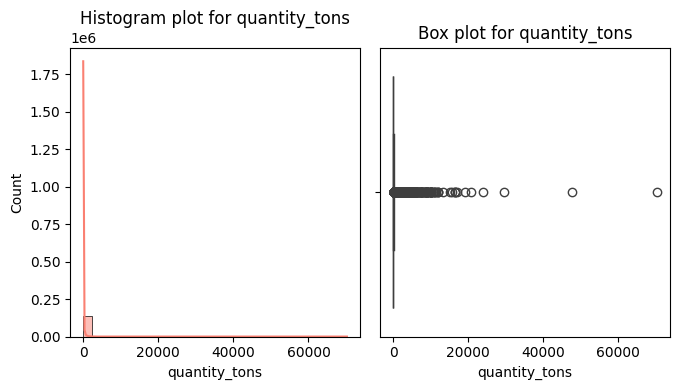

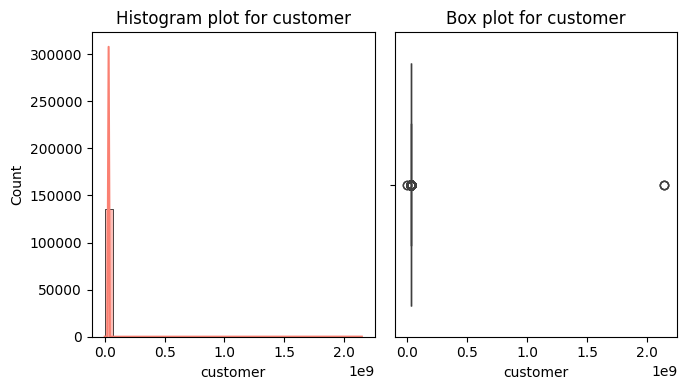

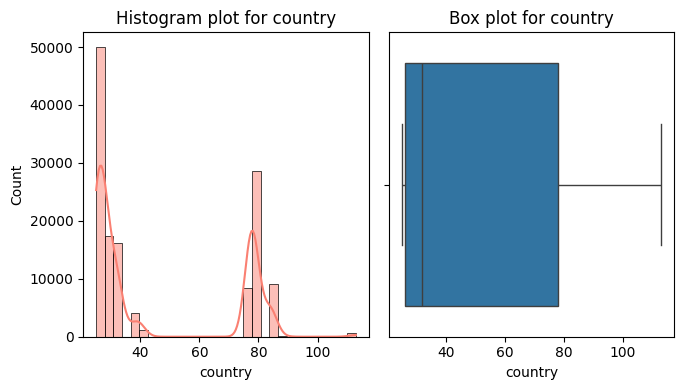

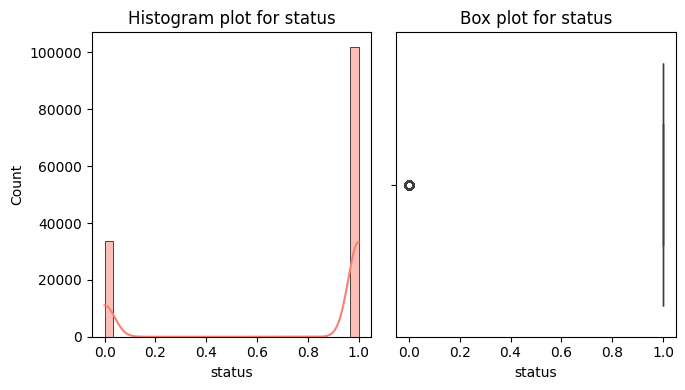

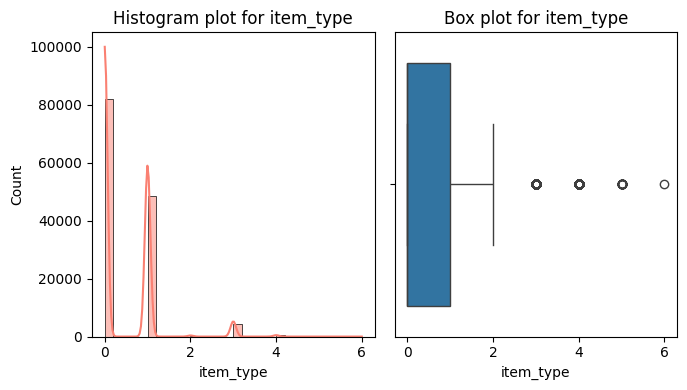

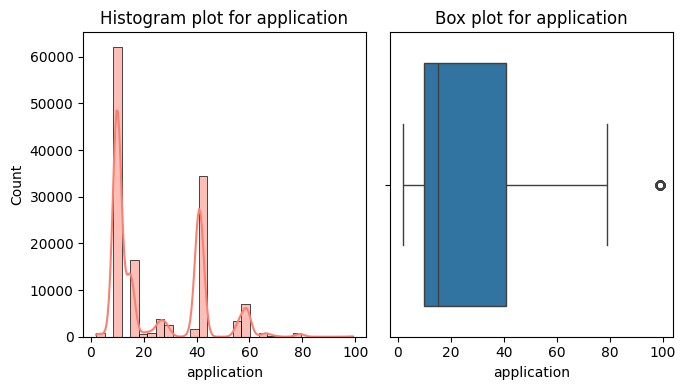

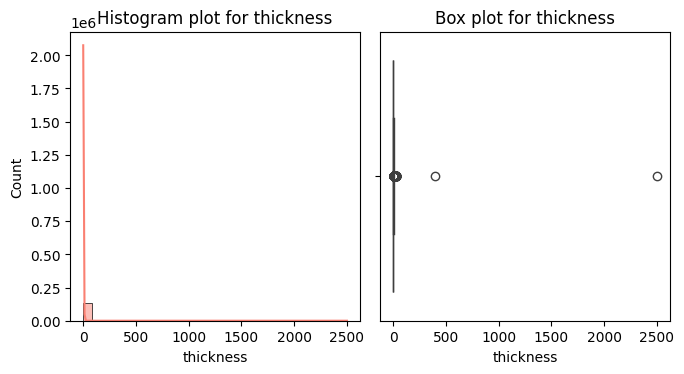

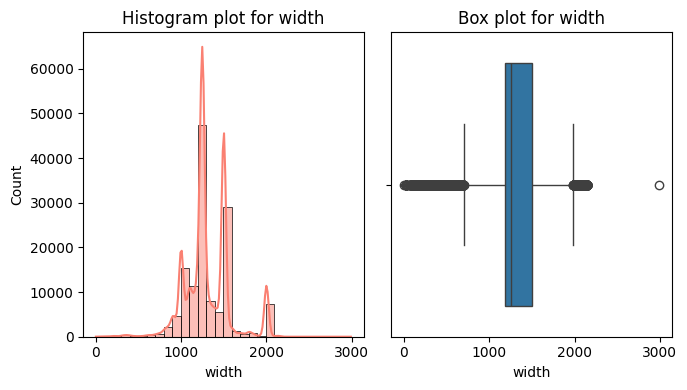

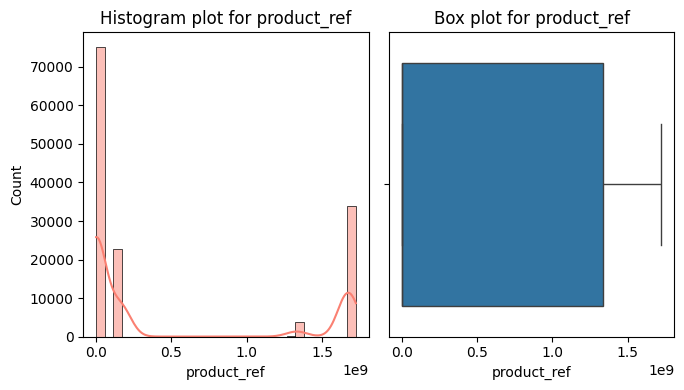

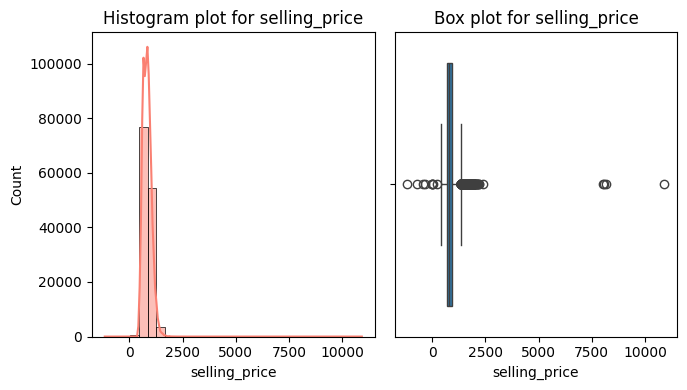

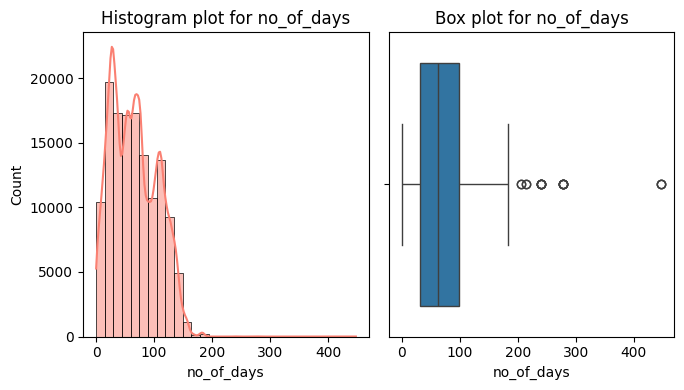

In [30]:
def plot(df, column):
    # Create a figure with subplots
    plt.figure(figsize=(10,4))
    

    # Histogram plot
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True, bins=30, color="salmon")
    plt.title("Histogram plot for " + column)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[column])
    plt.title("Box plot for " + column)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

# List of skewed columns
skewed_columns = ['quantity_tons', 'customer', 'country', 'status', 'item_type',
                  'application', 'thickness', 'width', 'product_ref', 'selling_price',
                  'no_of_days']

# Plot each skewed column
for col in skewed_columns:
    plot(df, col)


In [31]:
# Filter out non-positive values
df = df[(df['selling_price'] > 0) & (df['quantity_tons'] > 0) & (df['customer'] > 0)]

# Apply log transformation
df['selling_price'] = np.log(df['selling_price'])
df['quantity_tons'] = np.log(df['quantity_tons'])
df['customer'] = np.log(df['customer'])
df['thickness'] = np.log(df['thickness'])

In [32]:

col =  ['quantity_tons','customer','thickness','selling_price']
for i in col:
  print(df[i].skew(),'Positive Skew' if df[i].skew()>0 else 'Negative Skew')

-0.05985214853214626 Negative Skew
-71.09130074727288 Negative Skew
0.2993405184494201 Positive Skew
-0.4124076801373166 Negative Skew


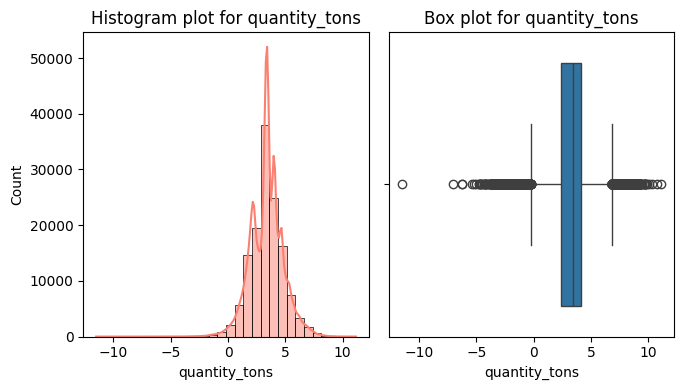

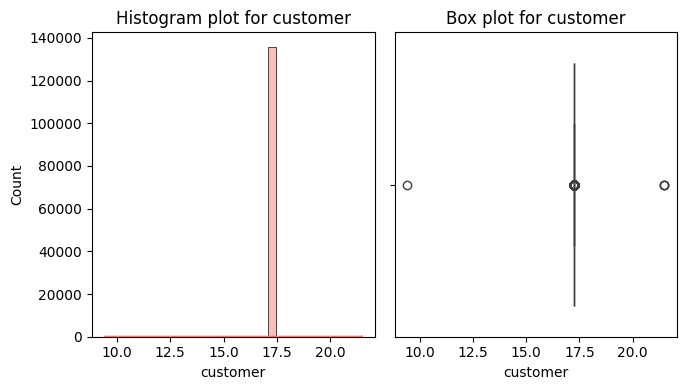

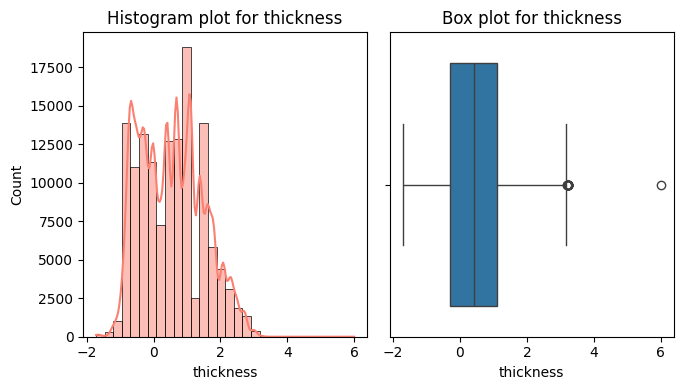

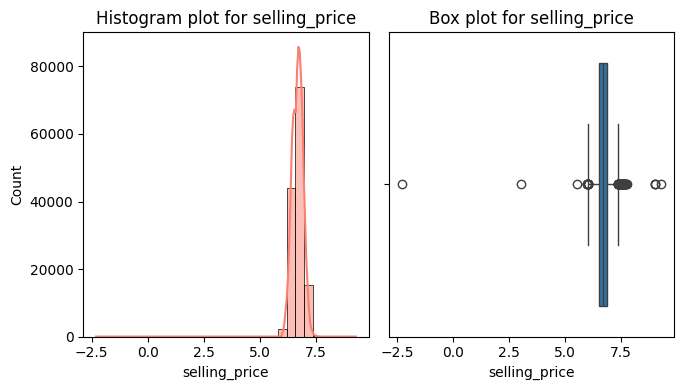

In [33]:
# after log transformation
skewed_columns_log = ['quantity_tons','customer','thickness','selling_price']
for i in skewed_columns_log:
    plot(df,i)

In [34]:
df.head()

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,no_of_days
0,3.991779,17.221905,28.0,1,0,10.0,0.693147,1500.0,1670798778,6.749931,91.0
1,6.643822,17.223450,25.0,1,0,41.0,-0.223144,1210.0,1668701718,6.953684,0.0
5,5.419608,17.223450,25.0,1,0,41.0,0.405465,1265.0,1668701718,6.890609,0.0
8,4.235147,17.228025,38.0,1,1,10.0,-0.510826,1275.0,1668701376,7.217443,91.0
9,6.446714,17.223450,25.0,1,0,41.0,0.405465,1165.0,1668701718,6.890609,0.0


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,135780.0,3.378267e+00,1.431482e+00,-11.512925,2.391306,3.402240,4.161658e+00,1.115985e+01
customer,135780.0,1.722452e+01,2.923177e-02,9.430118,17.223261,17.223528,1.722601e+01,2.148756e+01
country,135780.0,4.601861e+01,2.466522e+01,25.000000,26.000000,32.000000,7.800000e+01,1.130000e+02
status,135780.0,7.510237e-01,4.324216e-01,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
item_type,135780.0,4.710708e-01,6.965492e-01,0.000000,0.000000,0.000000,1.000000e+00,6.000000e+00
application,135780.0,2.435442e+01,1.746517e+01,2.000000,10.000000,15.000000,4.100000e+01,9.900000e+01
thickness,135780.0,5.365078e-01,9.294134e-01,-1.714798,-0.287682,0.405465,1.098612e+00,5.991465e+00
width,135780.0,1.304822e+03,2.667846e+02,1.000000,1180.000000,1250.000000,1.500000e+03,2.990000e+03
product_ref,135780.0,4.839891e+08,7.209896e+08,611728.000000,628377.000000,640665.000000,1.332077e+09,1.722208e+09
selling_price,135780.0,6.694974e+00,2.387778e-01,-2.302585,6.519147,6.704420,6.862758e+00,9.297710e+00


In [36]:
# handling outliers using IQR method

def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    iqr = q3-q1
    
    upper_threshold= q3 + (1.5*iqr)
    lower_threshold= q1 - (1.5*iqr)

    df[column]= df[column].clip(lower_threshold, upper_threshold)

In [37]:
df.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'no_of_days'],
      dtype='object')

In [38]:
df.describe()

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,no_of_days
count,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,1.357800e+05,135780.000000,135780.000000
mean,3.378267,17.224521,46.018611,0.751024,0.471071,24.354419,0.536508,1304.821659,4.839891e+08,6.694974,66.214656
std,1.431482,0.029232,24.665218,0.432422,0.696549,17.465171,0.929413,266.784631,7.209896e+08,0.238778,39.261320
min,-11.512925,9.430118,25.000000,0.000000,0.000000,2.000000,-1.714798,1.000000,6.117280e+05,-2.302585,0.000000
25%,2.391306,17.223261,26.000000,1.000000,0.000000,10.000000,-0.287682,1180.000000,6.283770e+05,6.519147,31.000000
50%,3.402240,17.223528,32.000000,1.000000,0.000000,15.000000,0.405465,1250.000000,6.406650e+05,6.704420,63.000000
75%,4.161658,17.226012,78.000000,1.000000,1.000000,41.000000,1.098612,1500.000000,1.332077e+09,6.862758,99.000000
max,11.159849,21.487563,113.000000,1.000000,6.000000,99.000000,5.991465,2990.000000,1.722208e+09,9.297710,448.000000


In [39]:
outlier_columns = ['quantity_tons', 'customer', 'country',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'no_of_days']
for i in outlier_columns:
    outlier(df,i)

In [40]:
df.describe()

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,no_of_days
count,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,135780.000000,1.357800e+05,135780.000000,135780.000000
mean,3.378295,17.224484,46.018611,0.751024,0.471071,24.346458,0.536480,1306.046815,4.839891e+08,6.694883,66.203815
std,1.379063,0.002348,24.665218,0.432422,0.696549,17.433735,0.929302,255.300933,7.209896e+08,0.236585,39.202660
min,-0.264221,17.219134,25.000000,0.000000,0.000000,2.000000,-1.714798,700.000000,6.117280e+05,6.003731,0.000000
25%,2.391306,17.223261,26.000000,1.000000,0.000000,10.000000,-0.287682,1180.000000,6.283770e+05,6.519147,31.000000
50%,3.402240,17.223528,32.000000,1.000000,0.000000,15.000000,0.405465,1250.000000,6.406650e+05,6.704420,63.000000
75%,4.161658,17.226012,78.000000,1.000000,1.000000,41.000000,1.098612,1500.000000,1.332077e+09,6.862758,99.000000
max,6.817186,17.230138,113.000000,1.000000,6.000000,87.500000,3.178054,1980.000000,1.722208e+09,7.378174,201.000000


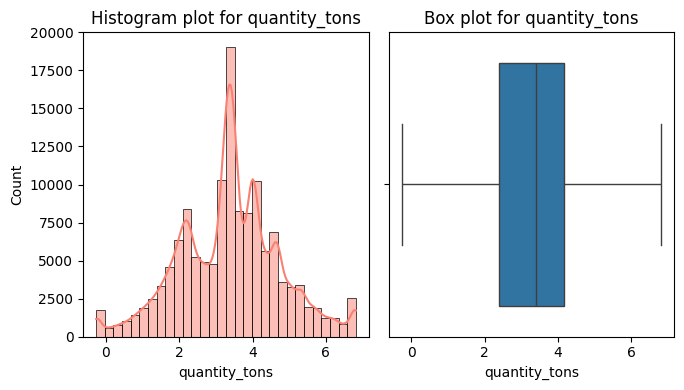

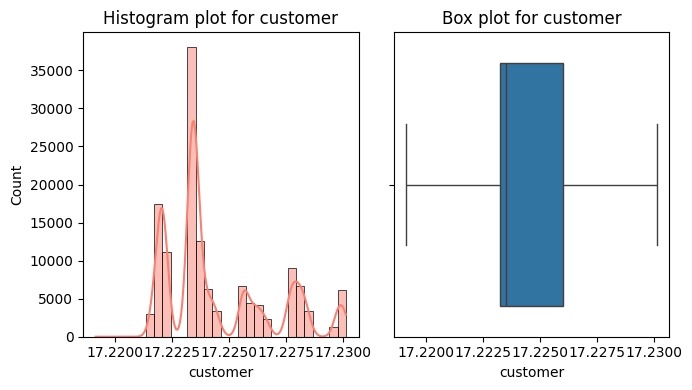

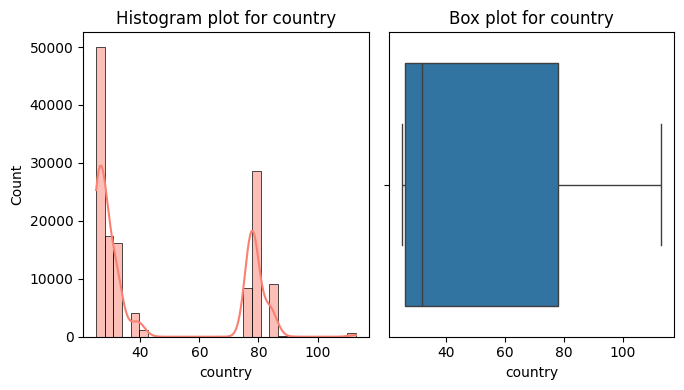

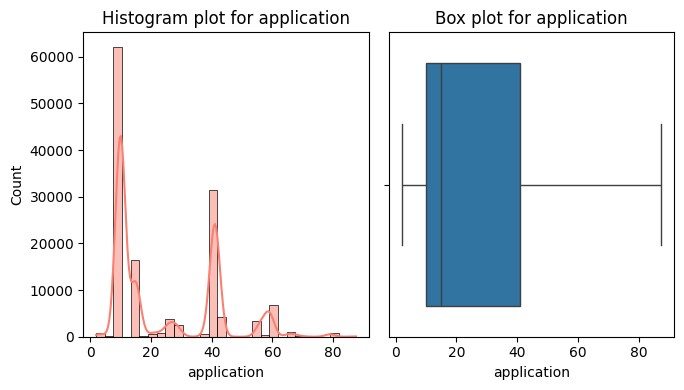

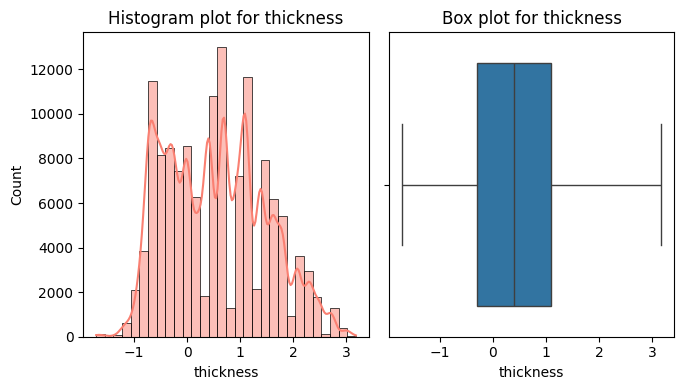

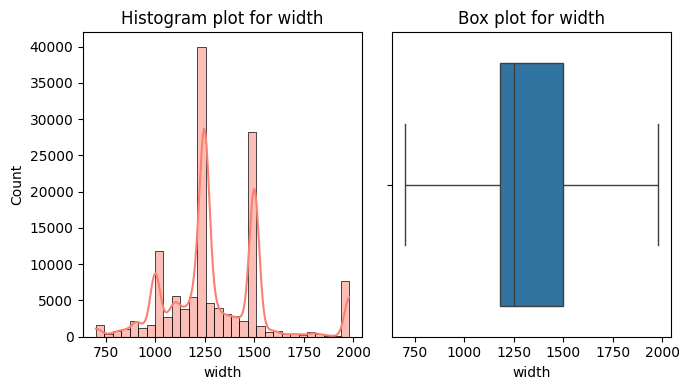

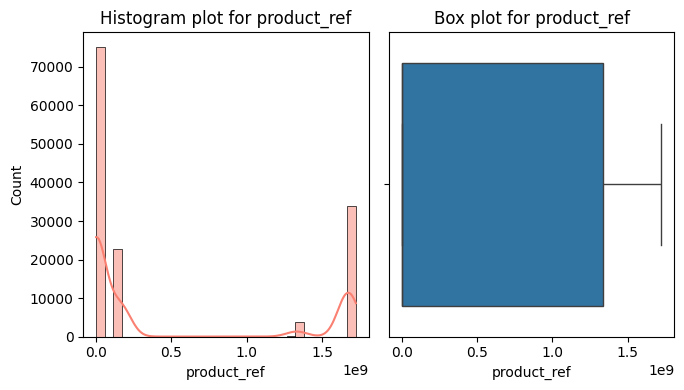

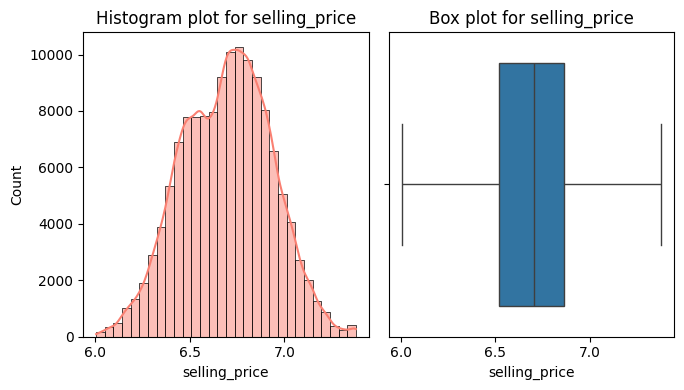

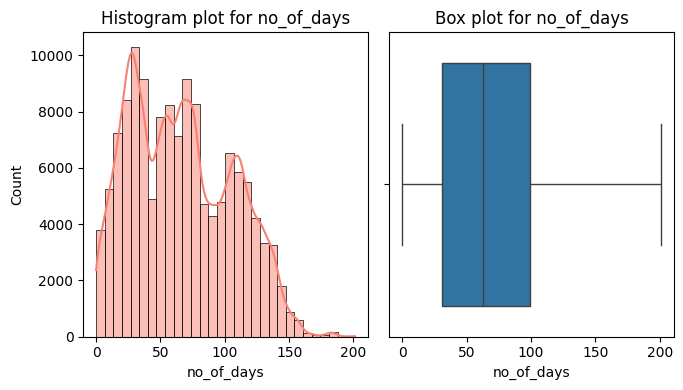

In [41]:
# ploting
for i in outlier_columns:
    plot(df,i)

In [42]:
df.head(25)

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,no_of_days
0,3.991779,17.221905,28.0,1,0,10.0,0.693147,1500.0,1670798778,6.749931,91.0
1,6.643822,17.223450,25.0,1,0,41.0,-0.223144,1210.0,1668701718,6.953684,0.0
5,5.419608,17.223450,25.0,1,0,41.0,0.405465,1265.0,1668701718,6.890609,0.0
8,4.235147,17.228025,38.0,1,1,10.0,-0.510826,1275.0,1668701376,7.217443,91.0
9,6.446714,17.223450,25.0,1,0,41.0,0.405465,1165.0,1668701718,6.890609,0.0
12,3.314642,17.222210,78.0,1,0,10.0,-0.287682,1250.0,164141591,7.001246,91.0
13,3.473063,17.223431,27.0,1,1,10.0,-0.510826,1010.0,628377,6.880384,91.0
16,4.319145,17.221812,30.0,1,0,41.0,-0.519194,1265.0,611993,7.057777,0.0
17,3.035295,17.223724,30.0,1,0,10.0,-0.798508,900.0,611993,7.181736,91.0
20,4.267835,17.221812,30.0,1,0,41.0,-0.519194,1265.0,611993,7.057304,0.0


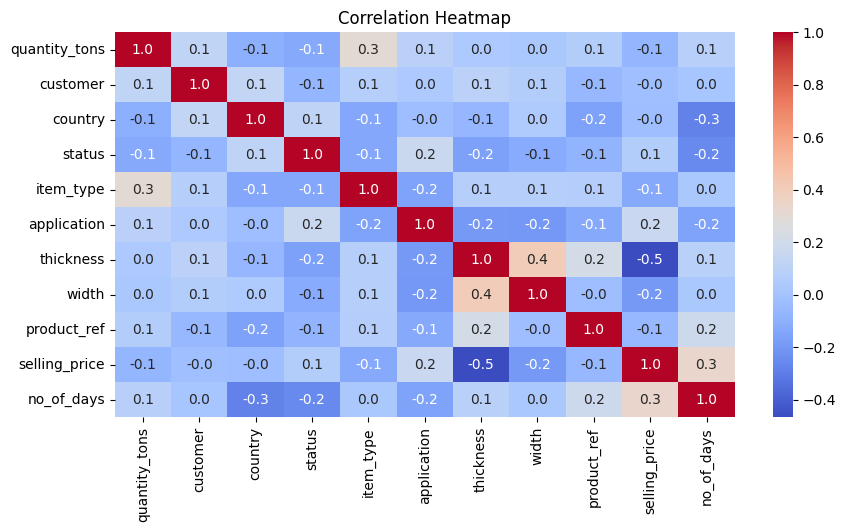

In [43]:
# Calculate the correlation matrix
df_corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_corr, annot=True, fmt="0.1f", cmap='coolwarm') 
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# saving the model
df.to_csv("Industrial_Copper_proper.csv",index= False)


In [45]:
# IMPORTING THE ML PACKAGES

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from imblearn.combine import SMOTETomek
import pickle

In [46]:
# Predicting the classification model


df.head()

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,no_of_days
0,3.991779,17.221905,28.0,1,0,10.0,0.693147,1500.0,1670798778,6.749931,91.0
1,6.643822,17.223450,25.0,1,0,41.0,-0.223144,1210.0,1668701718,6.953684,0.0
5,5.419608,17.223450,25.0,1,0,41.0,0.405465,1265.0,1668701718,6.890609,0.0
8,4.235147,17.228025,38.0,1,1,10.0,-0.510826,1275.0,1668701376,7.217443,91.0
9,6.446714,17.223450,25.0,1,0,41.0,0.405465,1165.0,1668701718,6.890609,0.0


In [47]:
df['status'].value_counts()

status
1    101974
0     33806
Name: count, dtype: int64

In [48]:
x = df.drop(columns=['status'],axis=1) # feature
y = df['status'] # target

In [49]:
x.shape,y.shape

((135780, 10), (135780,))

In [50]:
# this is a imbalance data so we want to resampling using "SMOTETomek"
x_new,y_new = SMOTETomek().fit_resample(x,y)


In [51]:
x_new.shape,y_new.shape

((201002, 10), (201002,))

In [52]:
y_new.value_counts()

status
1    100501
0    100501
Name: count, dtype: int64

In [53]:
def accuracy(x,y,algorithm):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model = algorithm().fit(x_train,y_train)
    # predict
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # accuracy score
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    
    # metrics
    metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
    return metrics

In [54]:
print(accuracy(x_new,y_new,DecisionTreeClassifier))
print(accuracy(x_new,y_new,RandomForestClassifier))
print(accuracy(x_new,y_new,ExtraTreesClassifier))
print(accuracy(x_new,y_new,AdaBoostClassifier))
print(accuracy(x_new,y_new,GradientBoostingClassifier))
print(accuracy(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9555483694435462}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9776622472077809}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9809457476182184}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7622465034421427, 'Accuracy_Test': 0.7618715952339494}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8050696202138047, 'Accuracy_Test': 0.8031392253924031}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9410513616208854, 'Accuracy_Test': 0.9319419914927489}


In [60]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# Define a reduced set of hyperparameters to tune
parameters = {
    "max_depth": [5, 10],  # Fewer options
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt']  # Limit to 'sqrt'
}

# Initialize GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100),  # Limit number of trees
                          param_grid=parameters,
                          cv=5,  # Reduced number of cross-validation folds
                          n_jobs=-1)

# Fit the model to the training data
gridsearch.fit(x_train, y_train)

# Get the best parameters and score
best_params = gridsearch.best_params_
best_score = gridsearch.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validated Score:", best_score)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validated Score: 0.8729298920651246


In [62]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=10, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=5).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.8803116896039204
Accuracy_Test:  0.8733862341732793
  
Confution_matrix for Test
--------------------------
[[18976  1216]
 [ 3874 16135]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     20192
           1       0.93      0.81      0.86     20009

    accuracy                           0.87     40201
   macro avg       0.88      0.87      0.87     40201
weighted avg       0.88      0.87      0.87     40201



In [63]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.06022187 1.        ]
[0.         0.80638713 1.        ]
 
auc_curve: 0.8730826278729247


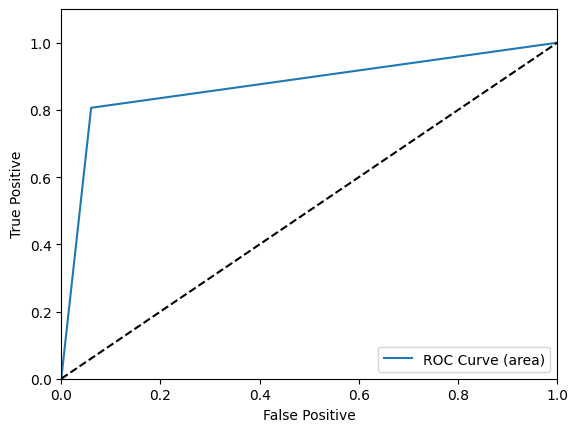

In [64]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [70]:
user_data = np.array([[3.991779,17.221905,28.0,0,10.0,0.693147,1500.0,1670798778,6.749931,91.0]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [71]:
#saving the model using the pickle

with open("Classification_model_copper.pkl","wb") as x:
    pickle.dump(model,x)

In [72]:
with open(r'E:\Naren Baskar\indus new\Classification_model_copper.pkl','rb') as y:
    classy_model = pickle.load(y)

In [76]:
user_data = np.array([[4.025862,17.222079,30.0,1,10.0,2.060514,1500.0,640665,6.126869,30.0]])
y_pred_user= classy_model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


In [81]:
# Regression model ---predicting the selling price

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
     

In [82]:
def regressor(df,algorithm):
    x = df.drop(columns=['selling_price'],axis=1)
    y = df['selling_price']

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model = algorithm().fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_train_score = r2_score(y_train,y_pred_train)
    r2_test_score = r2_score(y_test,y_pred_test)

    metrics = {"Algorithm":algorithm.__name__,
            "R2_train" :r2_train_score,
            "R2_test" :r2_test_score}
    return metrics


In [83]:
print(regressor(df,DecisionTreeRegressor))
print(regressor(df,RandomForestRegressor))
print(regressor(df,AdaBoostRegressor))
print(regressor(df,XGBRegressor))
print(regressor(df,GradientBoostingRegressor))
print(regressor(df,ExtraTreesRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9998209219655291, 'R2_test': 0.8618007513523306}
{'Algorithm': 'RandomForestRegressor', 'R2_train': 0.9885456600233918, 'R2_test': 0.9214543819388824}
{'Algorithm': 'AdaBoostRegressor', 'R2_train': 0.5114253625036578, 'R2_test': 0.5111789054668754}
{'Algorithm': 'XGBRegressor', 'R2_train': 0.8560450465588396, 'R2_test': 0.8431676890680602}
{'Algorithm': 'GradientBoostingRegressor', 'R2_train': 0.6566980537530676, 'R2_test': 0.6543121968032009}
{'Algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9998209219655291, 'R2_test': 0.9221717628050623}


In [84]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# Define a reduced set of hyperparameters to tune
parameters = {
    "max_depth": [5, 10],  # Fewer options
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt']  # Limit to 'sqrt'
}

# Initialize GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),  # Limit number of trees
                          param_grid=parameters,
                          cv=5,  # Reduced number of cross-validation folds
                          n_jobs=-1)

# Fit the model to the training data
gridsearch.fit(x_train, y_train)

# Get the best parameters and score
best_params = gridsearch.best_params_
best_score = gridsearch.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validated Score:", best_score)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validated Score: 0.5843706494927821


In [85]:
# passing the parameters

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.7168661471513249, 0.7080005849830222)

In [86]:
# calculating the accuracy with metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2).fit(x_train, y_train)
y_pred_test = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}



In [87]:
print(metrics_r)

{'R2': 0.7076666866435701, 'Mean Absolute Error': np.float64(0.10304684810511236), 'Mean Squared Error': np.float64(0.01651846601607156), 'Root Mean Squared Error': np.float64(0.12852418455711578)}


In [88]:
# save the file using pickle

with open ("regression_model.pkl",'wb') as x1:
    pickle.dump(model_r,x1)

In [89]:
with open (r'E:\Naren Baskar\indus new\regression_model.pkl','rb') as y1:
    reg_model = pickle.load(y1)

In [91]:
np.exp(6.749931)

np.float64(853.9998345045775)

In [94]:
x.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'no_of_days'],
      dtype='object')

In [95]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,no_of_days
0,3.991779,17.221905,28.0,1,0,10.0,0.693147,1500.0,1670798778,6.749931,91.0
1,6.643822,17.223450,25.0,1,0,41.0,-0.223144,1210.0,1668701718,6.953684,0.0
5,5.419608,17.223450,25.0,1,0,41.0,0.405465,1265.0,1668701718,6.890609,0.0
8,4.235147,17.228025,38.0,1,1,10.0,-0.510826,1275.0,1668701376,7.217443,91.0
9,6.446714,17.223450,25.0,1,0,41.0,0.405465,1165.0,1668701718,6.890609,0.0
...,...,...,...,...,...,...,...,...,...,...,...
181433,3.472467,17.224270,25.0,0,1,15.0,1.791759,1980.0,640665,6.313548,30.0
181525,4.196171,17.222079,30.0,0,1,10.0,1.348073,1525.0,640665,6.126869,30.0
181527,4.156686,17.222079,30.0,0,1,10.0,1.766442,1525.0,640665,6.124683,30.0
181529,4.025862,17.222079,30.0,0,1,10.0,2.060514,1500.0,640665,6.126869,30.0


In [ ]:
df['selling ']

In [96]:
np.exp(6.749931)

np.float64(853.9998345045775)